In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 流形学习（Manifold Learning）

PCA的分解技术实质上是将特征表示为一组特征的线性组合。相对线性，存在非线性的情况，例如，假如（即使）一张图片是线性的，那么这张图片完全贴在一个非线性的曲面上，那么这张图片就具有了非线性的自由度。

<center>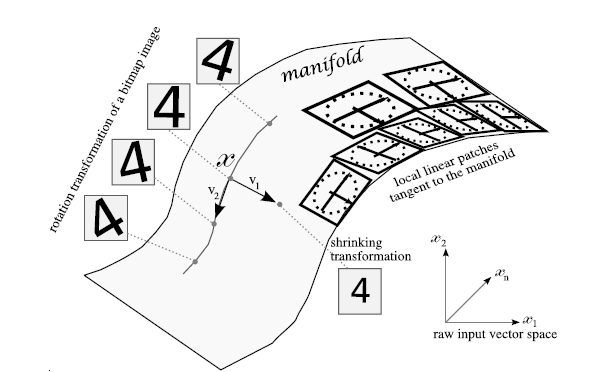</center>

> 直观的理解**流形**，下面地球表面（球的表面）就可以看做是一个二维流形，由于它能够由一群二维图形（欧式平面）来表示。 
> 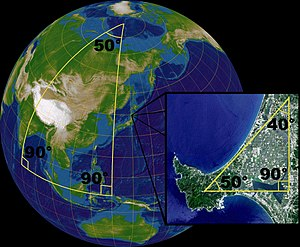
> 更感兴趣，可以参看[](https://bjlkeng.github.io/posts/manifolds/)

流形学习的基本假设：
* 数据中存在着可以通过流形建模的非线性关系—曲面跨越多个维度，平滑，且不太“摇摆”（太复杂）。
* 保持数据的多维形状并不重要。与其用特定的方向来“展开”或“投影”数据（如PCA）来保持数据的一般形状，不如执行更复杂的操作，如展开一个卷曲的条带或将球体从内向外翻转。
* 将曲面视为由几个邻域拼接组成的曲面。如果每个数据点都设法保持与所有其他点之间的距离，而只保留与它相邻的点之间的距离，则可以在数据中保持几何关系。


左侧是一种更像PCA的方法，用于保存数据的形状，其中每个点彼此连接。然而，右边是一种只计算数据点邻域之间的距离的方法。
<center>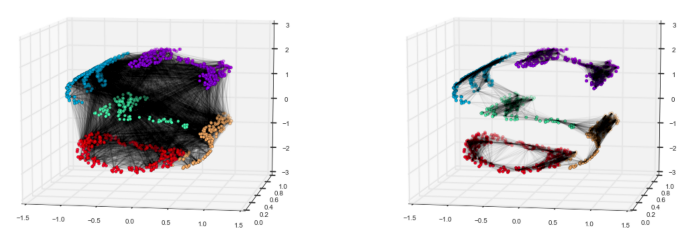</center>


对于右边情况，可以将其展开、摊平，而不改变其相对位置
<center>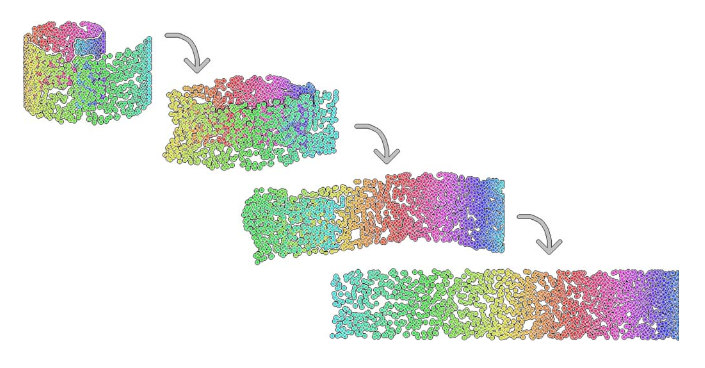</center>



**t-SNE**（t-distributed stochastic neighbor embedding, t分布式随机邻域嵌入)是一种非线性降维的方法，
在降维后保留各个点间相对距离结构。

t-SNE是高维可视化中最流行的选择之一，参用t分布随机邻居嵌入。
该算法将原始空间中的关系转化为t分布，即小样本和相对未知标准差的正态分布。这使得t-SNE对流形学习中常见的局部结构非常敏感。

优点如下：
* 它能够在多个尺度上揭示数据的结构。
* 它揭示了存在于多个流形和簇中的数据
* 在中心聚集点的趋势较小。

前提是基于这样的假设：尽管现实世界中的许多数据集是嵌入在高维空间中，但是都具有很低的内在维度。
也就是说高维数据经过降维后，在低维状态下更能显示出其本质特性。这就是流行学习的基本思想，也称为非线性降维。

缺点：
* t-SNE在计算上非常昂贵。对于一百万个样本数据集，它可能需要几个小时，而PCA可以在几秒钟或几分钟内完成。
* 该算法利用随机性（随机性）选取种子，如果种子放置不当，会增加算法的运行时间，降低性能。
* 全局结构没有被显式地保留（即更强调聚类而不是展示全局结构）。然而，在sklearn的实现中，这个问题可以通过使用PCA初始化点来解决，PCA是专门为保持全局结构而构建的。

t-SNE模型是非监督的降维，他跟PCAs等不同，他不能通过训练得到一些东西之后再用于其它数据，而t-SNE只能单独的对数据做操作。
在`scikit-learning`里只有fit_transform，而没有fit操作。

> 参考 *[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)*

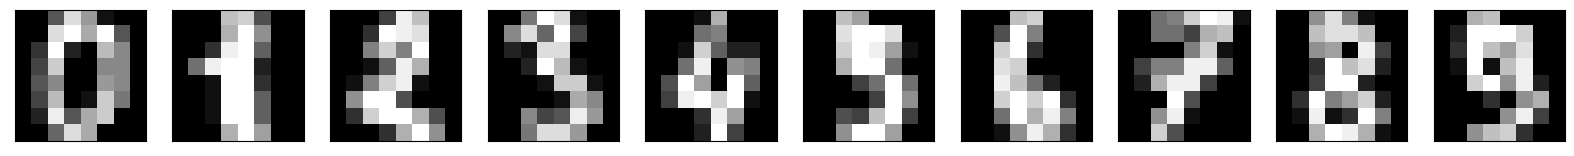

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(1, 10, figsize=(20, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap="gray")

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)

pca.fit(digits.data)

digits_pca = pca.transform(digits.data)

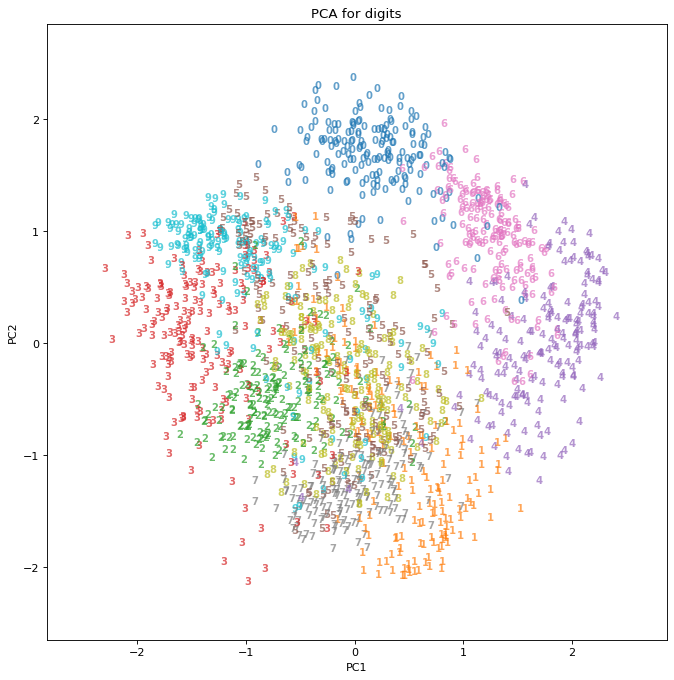

In [4]:
digit_labels = [f"{i}" for i in digits.target]
n_samples = len(digits.data)


plt.figure(figsize=(10, 10), dpi=80)
ax = plt.gca()
eps = 0.5
# ax.set_aspect("equal")
ax.set_xlim(digits_pca[:, 0].min() - eps, digits_pca[:, 0].max() + eps)
ax.set_ylim(digits_pca[:, 1].min() - eps, digits_pca[:, 1].max() + eps)
for i in range(n_samples):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], digit_labels[i], 
             color = plt.cm.tab10(digits.target[i]), alpha=0.7,
             fontdict={'weight': 'bold', 'size': 9})
ax.set_xlabel("PC1"); ax.set_ylabel("PC2")
ax.set_title("PCA for digits");

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=40, learning_rate='auto', init='pca')

digits_tsne = tsne.fit_transform(digits.data)

/w/edu/cpy39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


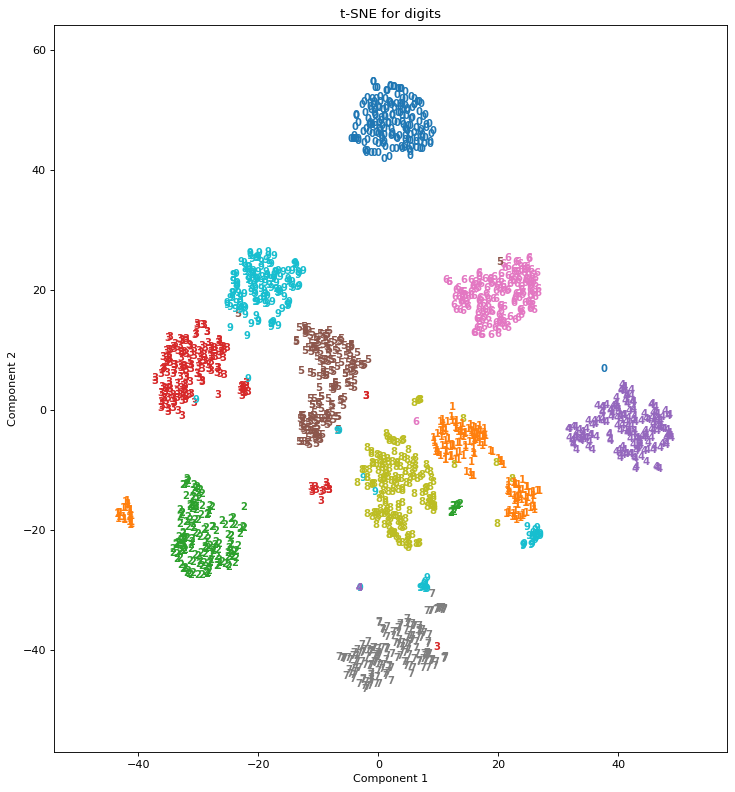

In [6]:
plt.figure(figsize=(10, 10), dpi=80)
ax = plt.gca()

digit_labels = [f"{i}" for i in digits.target]
n_samples = len(digits.data)

eps = 10
ax.set_aspect("equal")
ax.set_xlim(digits_tsne[:, 0].min() - eps, digits_tsne[:, 0].max() + eps)
ax.set_ylim(digits_tsne[:, 1].min() - eps, digits_tsne[:, 1].max() + eps)
for i in range(n_samples):
    ax.text(digits_tsne[i, 0], digits_tsne[i, 1], digit_labels[i], 
             color = plt.cm.tab10(digits.target[i]),
             fontdict={'weight': 'bold', 'size': 9})
ax.set_xlabel("Component 1"); ax.set_ylabel("Component 2")
ax.set_title("t-SNE for digits");


plt.tight_layout();

> 需要注意： 考虑t-SNE可视化结果中不同集群之间的距离是没有意义的，事实上如果你在同一个数据上运行t-SNE算法多次，很有可能得到多个不同“形态”的集群，可能有的时候0和1集群比较近，可能0和8集群比较近。
因为对t分布来说，超出一定距离范围以后，其相似度都是很小的。也就是说，只要不在一个集群范围内，其相似度都是一个很小的值，我们所看到的集群之间的呈现出来的距离并不能说明什么，这是由t-SNE的内在所决定的。

流形学习不是PCA的另一种变体，而是一种泛化。在PCA中表现良好的东西几乎可以保证在t-SNE或其他流形学习技术中表现良好，因为它们是泛化。
换句话说，如果这两种方法都失败了，数据结构或许很难建模。


使用t-SNE时，除了指定你想要降维的维度（参数n_components），另一个重要的参数是困惑度（Perplexity，参数perplexity）。


困惑度(perplexity)可以理解为邻里周边的大小，类似于kNN里的k，邻内的点数量，取值取决于数据的密度，一般设置为5到50。图左是低困惑度，图右是高困惑度
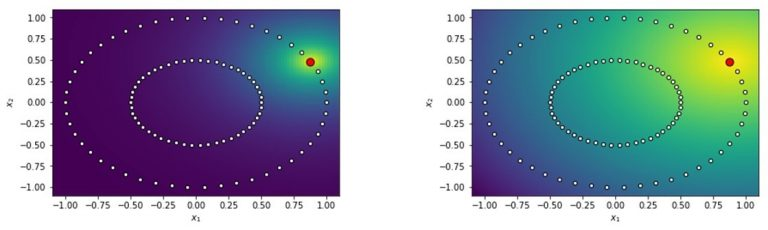

最易被我们视觉观察到的维数是一维，二维和三维，四维及以上用图形表达都不会那么直观。
然而，现实情况却是随意拿个数据集，都有上千上百个维度。
当我们想对高维数据集进行分类，但又不清楚这个数据集有没有很好的可分性（同类之间间隔小、异类之间间隔大）时，可以通过降维算法将数据投影到二维或三维空间中。

t-SNE优点
流形学习中其他方法如Isomap、LLE等，主要用于展开单个连续的低维流形（比如“瑞士卷”数据集），而t-SNE主要用于数据的局部结构，并且会倾向于提取出局部的簇，这种能力对于可视化同时包含多个流形的高维数据（比如MNIST数据集）很有效。

t-SNE缺点
* 时间、空间复杂度为O(n^2)，计算代价昂贵。百万量级的数据需要几小时，对于PCA可能只需要几分钟。

* 升级版Barnes-Hut t-SNE可以让复杂度降为O(nlogn)，但只限于获得二维和三维的嵌入。（sklearn中可以直接使用参数method='barnes_hut'）

* 由于代价函数非凸，多次执行算法的结果是随机的（名字中“Stochatsic”的由来？），需要多次运行选取最好的结果。

* 全局结构不能很清楚的保留。这个问题可以通过先用PCA降维到一个合理的维度（如50）后再用t-SNE来缓解，前置的PCA步骤也可以起到去除噪声等功能。（sklearn中可以直接使用参数init='pca'）